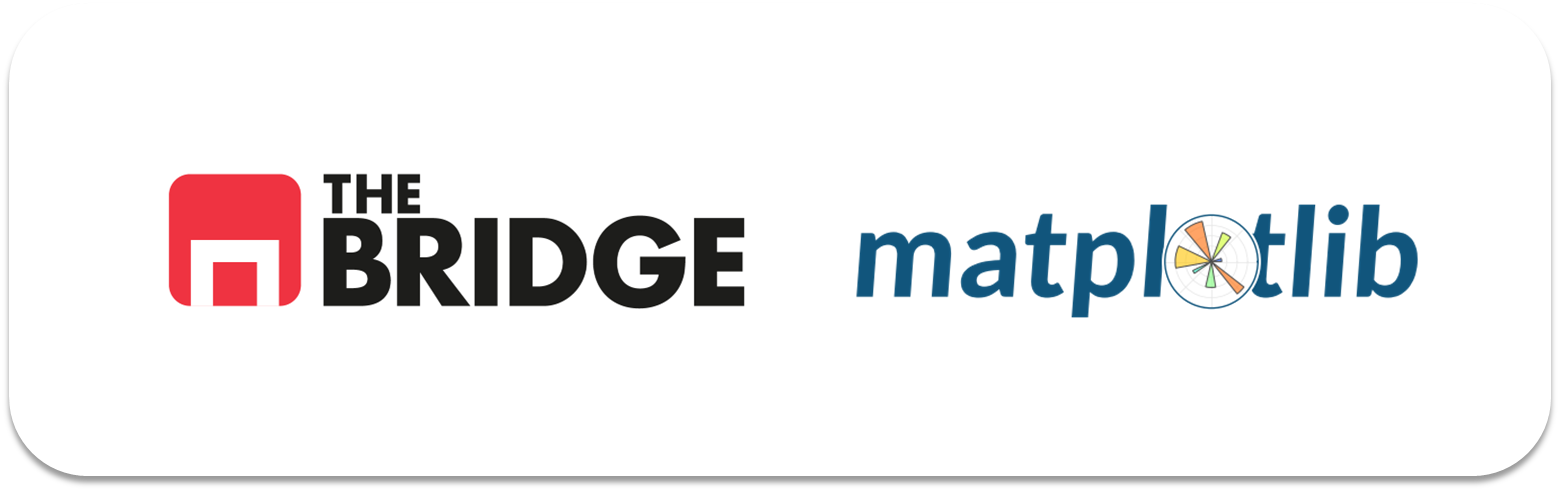

# Visualización con Matplotlib: Scatter Plots (Diagramas de dispersión)


Otro tipo de gráfico comúnmente utilizado es el gráfico de dispersión, un pariente cercano del gráfico de líneas, y que ya conoces de nuestros análisis bivariantes del sprint anterior.

En lugar de que los puntos estén unidos por segmentos de línea, aquí los puntos se representan individualmente con un punto, círculo u otra forma.

Comenzamos con nuestras importaciones:
```

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Gráficos de dispersión con ``plt.plot`` y ``ax.plot``

En la sesión anterior, vimos ``plt.plot``/``ax.plot`` para producir gráficos de líneas.
Resulta que esta misma función también puede producir gráficos de dispersión, con sólo cambiar algunos argumentos:
```

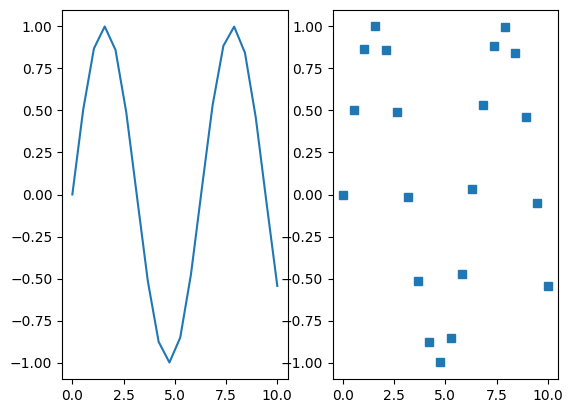

In [ ]:
x = np.linspace(0,10,20)
y = np.sin(x)
fig,ax = plt.subplots(1,2)
ax[0].plot(x,y, "-")
ax[1].plot(x,y, "s") # s = square
# o = circle

El tercer argumento en la llamada a la función es un carácter que representa el tipo de símbolo utilizado para el trazado. Al igual que puedes especificar opciones como ``'-'``, ``'--'`` para controlar el estilo de línea, el estilo del marcador tiene su propio conjunto de códigos de cadena cortos.  

La lista completa de símbolos disponibles se puede ver en la [documentación de ``plt.plot``](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), o en la documentación en línea de Matplotlib. La mayoría de las posibilidades son bastante intuitivas, y mostraremos algunos de los más comunes aquí:

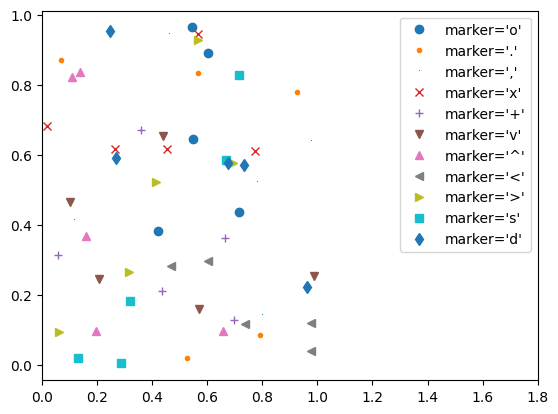

In [5]:
markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
rng = np.random.RandomState(0)
for marker in markers:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label=f"marker='{marker}'")
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Para aún más posibilidades, estos códigos de caracteres pueden ser utilizados junto con códigos de línea y color para trazar puntos junto con una línea que los conecte:

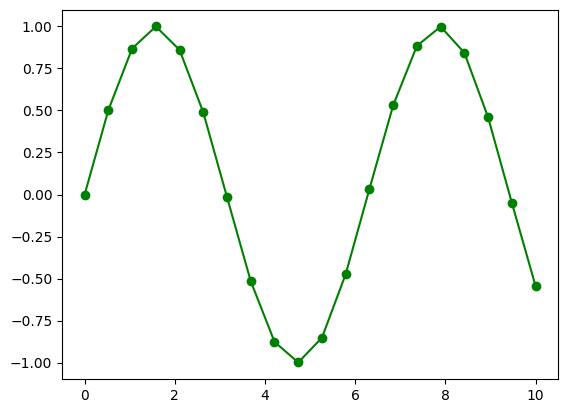

In [ ]:
plt.plot(x,y,"-og"); # línea, círculo, verde

In [ ]:
# ESta forma vista no es lo habitual, sino lo siguiente

### Gráficos de dispersión con ``plt.scatter`` y ``ax.scatter``

Un segundo método más potente para crear gráficos de dispersión es la función ``plt.scatter``, que se puede usar de manera muy similar a la función ``plt.plot`` y que es el que se usa en las funciones que empleamos en los análisis:


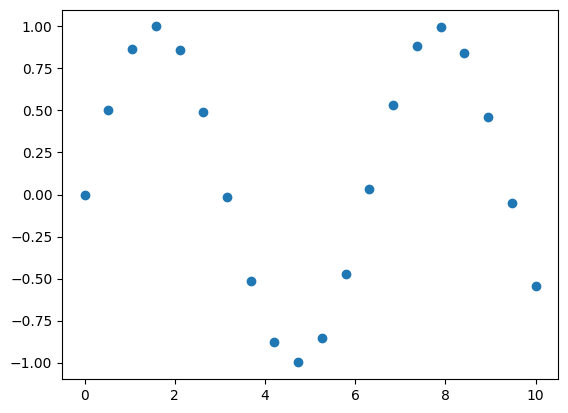

In [9]:
plt.scatter(x,y)


**La diferencia principal de ``plt.scatter`` con ``plt.plot`` es que se puede utilizar para crear gráficos de dispersión donde las propiedades de cada punto individual (tamaño, color de relleno, color de borde, etc.) pueden ser controladas individualmente o asignadas a datos.** De hecho, gracias a esto creamos los diagramas de burbujas donde el tamaño de los puntos depende de una tercera variable.

Veámoslo creando un gráfico de dispersión aleatorio con puntos de muchos colores y tamaños.
Para poder ver mejor los resultados superpuestos, también usaremos la palabra clave ``alpha`` para ajustar el nivel de transparencia:


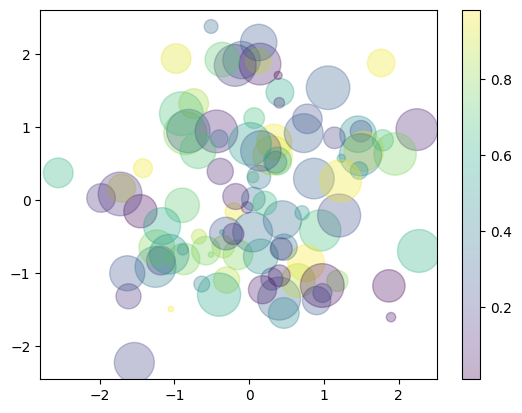

In [13]:
rng = np.random.RandomState(0)
plt.grid(False)
x = rng.randn(100) # edades
y = rng.randn(100) # alturas
colors = rng.rand(100) # pais
sizes = 1000 * rng.rand(100) # numero personas

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis');
plt.colorbar();

Para verlo con un dataset real, usemos otro de los dataset "hello, world" junto con el del titanic, el iris dataset, en el que vamos a mostrar las gráficas de tres tipos de flores de la misma familia enfrentando la longitud del pétalo y del sépalo y pintando cada tipo de flor de un color, y regulando el tamaño de los puntos con el ancho del sépalo:

In [18]:
df_iris = pd.read_csv("./data/iris.csv")
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,iris_class
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [19]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'iris_class'],
      dtype='object')

Text(0, 0.5, 'petal lenght (cm)')

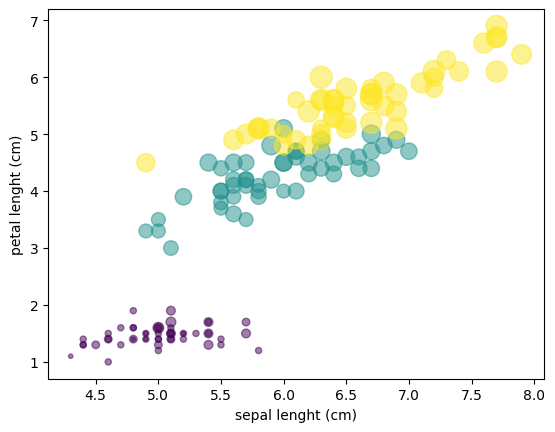

In [ ]:
plt.scatter(df_iris["sepal length (cm)"],df_iris["petal length (cm)"], c = df_iris.target, alpha = 0.5, s= 100*df_iris["petal width (cm)"])
plt.xlabel("sepal lenght (cm)")
plt.ylabel("petal lenght (cm)")


Podemos ver que este gráfico de dispersión nos ha dado la capacidad de **explorar simultáneamente cuatro dimensiones diferentes de los datos:**
la ubicación (x, y) de cada punto corresponde a la longitud y anchura del sépalo, el tamaño del punto está relacionado con la anchura del pétalo, y el color está relacionado con la especie particular de flor.
Gráficos de dispersión multicolores y multifuncionales como este pueden ser útiles tanto para la exploración como para la presentación de datos.

Nos lo apuntamos para enriquecer nuestra biblioteca de funciones...